In [ ]:
import pandas as pd
df = pd.read_csv('earnings_data.csv')
df.head()

,Ticker,Earnings,Revenue,Percentage change,Market cap,Industry
0,GMRE,-8,1.89,-0.20,673646784,REIT—Healthcare Facilities
1,CLX,40.34,7.25,1.57,18848952320,Household & Personal Products
2,LUNG,0,8.07,-0.94,499407360,Medical Devices
3,QRVO,126.67,1.77,-0.73,10411322368,Semiconductors
4,QCOM,3.31,0.72,-0.38,144006791168,Semiconductors


Get unique industries

In [ ]:
unique_values = df['Industry'].unique()
print(len(unique_values))
industries_dict = {}
for idx, industry in enumerate(unique_values):
  industries_dict[industry] = idx
for index in df.index:
    # Perform some operation to change the value (e.g., double the value)
    new_value = industries_dict[df.loc[index, 'Industry']]
    # Update the DataFrame with the new value
    df.loc[index, 'Industry'] = new_value
df.head()

139


,Ticker,Earnings,Revenue,Percentage change,Market cap,Industry
0,GMRE,-8,1.89,-0.20,673646784,0
1,CLX,40.34,7.25,1.57,18848952320,1
2,LUNG,0,8.07,-0.94,499407360,2
3,QRVO,126.67,1.77,-0.73,10411322368,3
4,QCOM,3.31,0.72,-0.38,144006791168,3


# Dataframe separation and data normalization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.pyplot import imshow
import numpy as np
import keras
import tensorflow as tf
import io
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import r2_score

import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import tensorflow.keras.backend as K
from keras.optimizers import Adam

numerical_columns = ['Earnings', 'Revenue', 'Percentage change', 'Market cap', 'Industry']
for col in numerical_columns:
    df[col] = df[col].replace(',', '', regex=True).astype(float)
non_numerical_columns = ['Ticker']
df.drop(columns=non_numerical_columns, inplace=True)
# Choose either MinMaxScaler or StandardScaler
#scaler = StandardScaler()
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
df = pd.DataFrame(scaled_data, columns=numerical_columns)

df = df.dropna(axis=0)
df = df.dropna()
number_of_rows_df = len(df.index)
train_data, temp_data = train_test_split(df, test_size=0.23, random_state=42)
test_data, val_data = train_test_split(temp_data, test_size=0.7, random_state=42)
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)
print("Validation data shape:", val_data.shape)
print("\n")


test_data.to_csv("testing.csv")
train_data.to_csv("training.csv")
val_data.to_csv("validation.csv")

X_testing = test_data.to_numpy()
testing_x = []
for vert_testing in X_testing:
  testing_x.append(vert_testing[:6])
X_testing = pd.DataFrame(data=np.array(testing_x, dtype=np.float32), columns= ['Earnings', 'Revenue', 'Percentage change', 'Market cap', 'Industry'])
y_testing = X_testing.iloc[:, [False, False, True, False, False]]
X_testing = X_testing.iloc[:, [True, True, False, True, True]]

X_train= train_data.to_numpy()
training_x = []
for vert_training in X_train:
  training_x.append(vert_training[:6])
X_train = pd.DataFrame(data=np.array(training_x, dtype=np.float32), columns= ['Earnings', 'Revenue', 'Percentage change', 'Market cap', 'Industry'])
y_train= X_train.iloc[:, [False, False, True, False, False]]
X_train = X_train.iloc[:, [True, True, False, True, True]]

X_val= val_data.to_numpy()
validation_x = []
for vert_validation in X_val:
  validation_x.append(vert_validation[:6])
X_val = pd.DataFrame(data=np.array(validation_x, dtype=np.float32), columns= ['Earnings', 'Revenue', 'Percentage change', 'Market cap', 'Industry'])
y_val= X_val.iloc[:, [False, False, True, False, False]]
X_val = X_val.iloc[:, [True, True, False, True, True]]

print(X_train)
print(y_train)

Training data shape: (1573, 5)
Testing data shape: (141, 5)
Validation data shape: (330, 5)


      Earnings   Revenue  Market cap  Industry
0     0.491084  0.000015    0.000021  0.065217
1     0.503859  0.000040    0.002640  0.231884
2     0.493827  0.000002    0.002420  0.086957
3     0.485314  0.000034    0.000051  0.702899
4     0.512709  0.000015    0.000068  0.471014
...        ...       ...         ...       ...
1568  0.498217  0.000022    0.001071  0.079710
1569  0.498519  0.000012    0.000294  0.608696
1570  0.497625  0.000017    0.000072  0.028986
1571  0.495370  0.000004    0.000022  0.760870
1572  0.492652  0.000004    0.000412  0.268116

[1573 rows x 4 columns]
      Percentage change
0              0.034314
1              0.034511
2              0.029803
3              0.043758
4              0.034846
...                 ...
1568           0.031300
1569           0.031733
1570           0.031510
1571           0.032489
1572           0.029231

[1573 rows x 1 columns]


      Earnings   Revenue  Market cap  Industry
1467  0.491084  0.000015    0.000021  0.065217
788   0.503859  0.000040    0.002640  0.231884
292   0.493827  0.000002    0.002420  0.086957
1573  0.485314  0.000034    0.000051  0.702899
1985  0.512709  0.000015    0.000068  0.471014
...        ...       ...         ...       ...
1131  0.498217  0.000022    0.001071  0.079710
1295  0.498519  0.000012    0.000294  0.608696
860   0.497625  0.000017    0.000072  0.028986
1461  0.495370  0.000004    0.000022  0.760870
1127  0.492652  0.000004    0.000412  0.268116

[1573 rows x 4 columns]
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 64)                320       
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                          

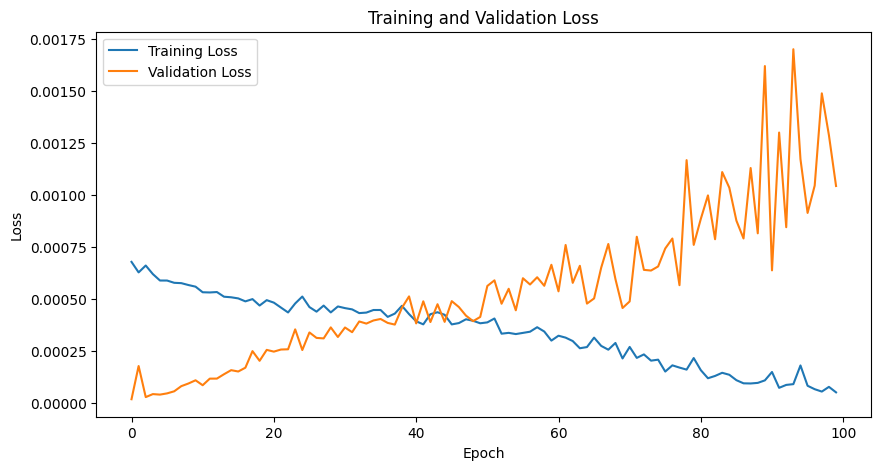

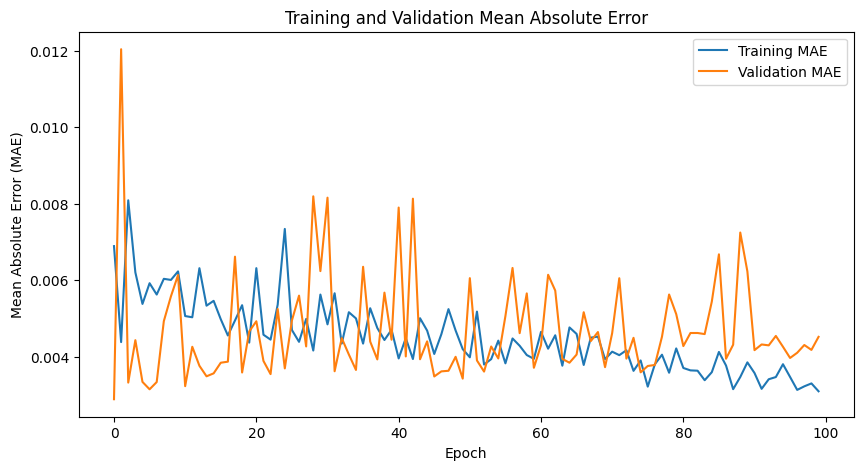

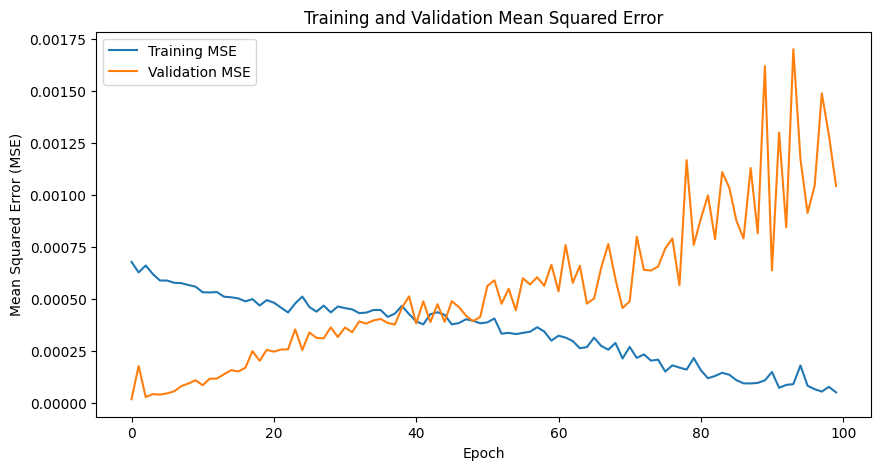

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Load preprocessed data
X_train = pd.read_csv("training.csv", index_col=0)
X_val = pd.read_csv("validation.csv", index_col=0)
y_train = X_train.pop('Percentage change').values
y_val = X_val.pop('Percentage change').values


print(X_train)
# Build the feedforward neural network (MLP) model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse'])

# Print the model summary
model.summary()

# Train the model
EPOCHS = 100
BATCH_SIZE = 32

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=(X_val, y_val)
)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation mean absolute error
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training and Validation Mean Absolute Error')
plt.legend()
plt.show()

# Plot training and validation mean squared error
plt.figure(figsize=(10, 5))
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Validation Mean Squared Error')
plt.legend()
plt.show()

In [ ]:
# Load preprocessed testing data
X_test = pd.read_csv("testing.csv", index_col=0)
y_test = X_test.pop('Percentage change').values

# Evaluate the model on the testing data
test_loss, test_mae, test_mse = model.evaluate(X_test, y_test, verbose=1)

print("Testing Loss:", test_loss)
print("Testing MAE:", test_mae)
print("Testing MSE:", test_mse)


model.save("earnings_model.h5")

5/5 [==============================] - 0s 4ms/step - loss: 2.5527e-05 - mae: 0.0034 - mse: 2.5527e-05
Testing Loss: 2.5526718673063442e-05
Testing MAE: 0.003445023437961936
Testing MSE: 2.5526718673063442e-05


In [ ]:
from keras.models import load_model

# Load the model
loaded_model = load_model("earnings_model.h5")

new_data = pd.read_csv("testing_earnings.csv")  # Replace with the actual filename

for index in new_data.index:
    # Perform some operation to change the value (e.g., double the value)
    new_value = industries_dict[new_data.loc[index, 'Industry']]
    # Update the DataFrame with the new value
    new_data.loc[index, 'Industry'] = new_value
new_data.head()
numerical_columns = ['Earnings', 'Revenue', 'Percentage change', 'Market cap', 'Industry']
for col in numerical_columns:
    new_data[col] = new_data[col].replace(',', '', regex=True).astype(float)

non_numerical_columns = ['Ticker']
new_data.drop(columns=non_numerical_columns, inplace=True)

scaled_data = scaler.transform(new_data)
new_data = pd.DataFrame(scaled_data, columns=numerical_columns)

X_new= new_data.to_numpy()
new_x = []
for vert_new in X_new:
  new_x.append(vert_new[:6])
X_new = pd.DataFrame(data=np.array(new_x, dtype=np.float32), columns= ['Earnings', 'Revenue', 'Percentage change', 'Market cap', 'Industry'])
y_new= X_new.iloc[:, [False, False, True, False, False]]
X_new = X_new.iloc[:, [True, True, False, True, True]]

predictions = loaded_model.predict(X_new)

# Print the predictions
print(predictions)

print(y_new)

1/1 [==============================] - 0s 89ms/step
[[ 0.0318507 ]
 [ 0.03312821]
 [ 0.03177517]
 [ 0.03182913]
 [ 0.03447372]
 [ 0.03150845]
 [ 0.03412378]
 [ 0.03224932]
 [ 0.03321975]
 [ 0.03126169]
 [ 0.03208455]
 [ 0.0310421 ]
 [-0.73016846]
 [ 0.0332178 ]
 [ 0.03477999]
 [ 0.03030539]
 [ 0.03193249]
 [ 0.03253048]
 [ 0.03284388]
 [ 0.03197032]
 [ 0.03412195]
 [ 0.03529123]
 [ 0.03176032]
 [ 0.03066542]
 [ 0.03209767]]
    Percentage change
0            0.029927
1            0.030479
2            0.043147
3            0.030748
4            0.032423
5            0.030098
6            0.025750
7            0.032081
8            0.031418
9            0.033099
10           0.032817
11           0.029986
12           0.028292
13           0.034899
14           0.040875
15           0.081645
16           0.095042
17           0.033723
18           0.047219
19           0.029947
20           0.028634
21           0.035963
22           0.034360
23           0.034557
24           0.034557
